In [1]:
#Importing the libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
#importing the dataset

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/earthchem_download_95122.txt', delimiter = "\t")
dataset

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,MAX AGE,MATERIAL,TYPE,COMPOSITION,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,CR2O3,FE2O3,FE2O3T,FEO,FEOT,NIO,MNO,MGO,CAO,NA2O,K2O,P2O5,BAO,LOI,H2O,H2O_M,H2O_P,SO3,V2O3,ZNO,FE,...,INDIUM,K,LI,MG.1,MN.1,MO,NA,NB,NI.1,P,PB,PD,RB,RE,S.1,SB,SC,SE,SN,SR,TA,TE,TH,TI,TL,U,V,W,Y,ZN.1,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
0,080385-4,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,69.144,0.565,14.590,NaN,NaN,NaN,NaN,4.261,NaN,0.081,1.111,3.544,4.402,2.141,0.162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,11,NaN,18.9,NaN,69.1,NaN,NaN,NaN,11.9,NaN,NaN,190.0,0.50,NaN,8.60,NaN,NaN,NaN,43.0,NaN,42.0,62,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230483-3,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,63.541,0.796,16.427,NaN,NaN,NaN,NaN,5.973,NaN,0.121,1.732,5.136,4.562,1.460,0.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,10,NaN,15.8,NaN,45.6,NaN,NaN,NaN,15.8,NaN,NaN,294.0,0.30,NaN,4.30,NaN,NaN,NaN,76.0,NaN,33.0,101,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PU-02-34,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5088,-72.2060,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,70.931,0.340,13.794,NaN,NaN,NaN,NaN,4.671,NaN,0.140,0.310,1.771,5.182,2.791,0.070,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,27,NaN,14.0,NaN,62.0,NaN,NaN,0.5,NaN,NaN,NaN,138.0,0.47,NaN,8.30,NaN,NaN,2.24,NaN,NaN,53.7,96,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PU-02-25,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5275,-72.1812,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,70.047,0.688,14.039,NaN,NaN,NaN,NaN,4.367,NaN,0.110,0.638,2.154,5.195,2.612,0.150,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.9,NaN,NaN,23.0,NaN,73.0,NaN,NaN,0.7,NaN,NaN,NaN,161.0,0.55,NaN,9.18,NaN,NaN,2.55,14.0,NaN,54.7,119,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PU-02-20,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5675,-72.1743,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,69.367,0.531,14.150,NaN,NaN,NaN,NaN,5.167,NaN,0.150,0.471,2.213,5.167,2.664,0.120,NaN,< 0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7,NaN,NaN,32.0,NaN,66.0,NaN,NaN,0.7,NaN,NaN,NaN,197.0,0.48,NaN,8.82,NaN,NaN,2.37,NaN,NaN,39.8,144,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,DBF-03-05,NaN,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",NaN,-18.1958,-69.2527,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,64.904,0.834,16.277,NaN,NaN,NaN,NaN,3.854,NaN,0.061,1.801,3.835,4.568,3.540,0.326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3059,DBF04-6,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1928,-69.2434,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,DBF04-5,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1929,-69.2433,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

**EXPLORATORY DATA ANALYSIS**

In [5]:
#top 5 rows

dataset.head()

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,MAX AGE,MATERIAL,TYPE,COMPOSITION,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,CR2O3,FE2O3,FE2O3T,FEO,FEOT,NIO,MNO,MGO,CAO,NA2O,K2O,P2O5,BAO,LOI,H2O,H2O_M,H2O_P,SO3,V2O3,ZNO,FE,...,INDIUM,K,LI,MG.1,MN.1,MO,NA,NB,NI.1,P,PB,PD,RB,RE,S.1,SB,SC,SE,SN,SR,TA,TE,TH,TI,TL,U,V,W,Y,ZN.1,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
0,080385-4,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,69.144,0.565,14.590,NaN,NaN,NaN,NaN,4.261,NaN,0.081,1.111,3.544,4.402,2.141,0.162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,11,NaN,18.9,NaN,69.1,NaN,NaN,NaN,11.9,NaN,NaN,190.0,0.50,NaN,8.60,NaN,NaN,NaN,43.0,NaN,42.0,62,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230483-3,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,63.541,0.796,16.427,NaN,NaN,NaN,NaN,5.973,NaN,0.121,1.732,5.136,4.562,1.460,0.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,10,NaN,15.8,NaN,45.6,NaN,NaN,NaN,15.8,NaN,NaN,294.0,0.30,NaN,4.30,NaN,NaN,NaN,76.0,NaN,33.0,101,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PU-02-34,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5088,-72.2060,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,70.931,0.340,13.794,NaN,NaN,NaN,NaN,4.671,NaN,0.140,0.310,1.771,5.182,2.791,0.070,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,27,NaN,14.0,NaN,62.0,NaN,NaN,0.5,NaN,NaN,NaN,138.0,0.47,NaN,8.30,NaN,NaN,2.24,NaN,NaN,53.7,96,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PU-02-25,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5275,-72.1812,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,70.047,0.688,14.039,NaN,NaN,NaN,NaN,4.367,NaN,0.110,0.638,2.154,5.195,2.612,0.150,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.9,NaN,NaN,23.0,NaN,73.0,NaN,NaN,0.7,NaN,NaN,NaN,161.0,0.55,NaN,9.18,NaN,NaN,2.55,14.0,NaN,54.7,119,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PU-02-20,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5675,-72.1743,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,69.367,0.531,14.150,NaN,NaN,NaN,NaN,5.167,NaN,0.150,0.471,2.213,5.167,2.664,0.120,NaN,< 0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7,NaN,NaN,32.0,NaN,66.0,NaN,NaN,0.7,NaN,NaN,NaN,197.0,0.48,NaN,8.82,NaN,NaN,2.37,NaN,NaN,39.8,144,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#last 5 rows
dataset.tail()

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,MAX AGE,MATERIAL,TYPE,COMPOSITION,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,CR2O3,FE2O3,FE2O3T,FEO,FEOT,NIO,MNO,MGO,CAO,NA2O,K2O,P2O5,BAO,LOI,H2O,H2O_M,H2O_P,SO3,V2O3,ZNO,FE,...,INDIUM,K,LI,MG.1,MN.1,MO,NA,NB,NI.1,P,PB,PD,RB,RE,S.1,SB,SC,SE,SN,SR,TA,TE,TH,TI,TL,U,V,W,Y,ZN.1,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
3058,DBF-03-05,NaN,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",NaN,-18.1958,-69.2527,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,64.904,0.834,16.277,NaN,NaN,NaN,NaN,3.854,NaN,0.061,1.801,3.835,4.568,3.540,0.326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3059,DBF04-6,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1928,-69.2434,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,DBF04-5,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1929,-69.2433,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061,CHO 099,NaN,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",NaN,-18.3014,-69.2431,0.01,2.6,12.80,23.0,igneous,volcanic,felsic,dacite,NaN,66.728,0.555,17.025,NaN,NaN,NaN,NaN,3.542,NaN,0.030,0.807,3.845,4.087,3.199,0.182,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,12,NaN,NaN,NaN,61.0,NaN,NaN,NaN,19.65,NaN,NaN,508.0,0.20,NaN,5.00,NaN,NaN,1.00,177.0,NaN,21.0,NaN,101.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3062,LAU-2/2,NaN,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",NaN,-18.2667,-69.3500,0.01,2.6,3.95,5.3,igneous,volcanic,felsic,rhyolite,NaN,75.179,0.129,13.810,NaN,NaN,NaN,NaN,0.850,NaN,0.072,0.145,1.007,3.738,5.051,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,3,NaN,15.0,NaN,94.0,NaN,NaN,NaN,3.3,NaN,NaN,1125.0,1.43,NaN,20.17,NaN,NaN,3.63,31.0,NaN,21.0,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Columns: 151 entries, SAMPLE ID to INDIUM.1
dtypes: float64(133), object(18)
memory usage: 3.5+ MB


In [8]:
dataset.info

<bound method DataFrame.info of       SAMPLE ID  IGSN  SOURCE  ... H2O_M.2 H2O_P.2  INDIUM.1
0      080385-4   NaN  GEOROC  ...     NaN     NaN       NaN
1      230483-3   NaN  GEOROC  ...     NaN     NaN       NaN
2      PU-02-34   NaN  GEOROC  ...     NaN     NaN       NaN
3      PU-02-25   NaN  GEOROC  ...     NaN     NaN       NaN
4      PU-02-20   NaN  GEOROC  ...     NaN     NaN       NaN
...         ...   ...     ...  ...     ...     ...       ...
3058  DBF-03-05   NaN  GEOROC  ...     NaN     NaN       NaN
3059    DBF04-6   NaN  GEOROC  ...     NaN     NaN       NaN
3060    DBF04-5   NaN  GEOROC  ...     NaN     NaN       NaN
3061    CHO 099   NaN  GEOROC  ...     NaN     0.0       NaN
3062    LAU-2/2   NaN  GEOROC  ...     NaN     NaN       NaN

[3063 rows x 151 columns]>

In [9]:
dataset.keys()

Index(['SAMPLE ID', 'IGSN', 'SOURCE', 'REFERENCE', 'CRUISE ID', 'LATITUDE',
       'LONGITUDE', 'LOC PREC', 'MIN AGE', 'AGE',
       ...
       'ZR', 'TI.1', 'AS.2', 'AS.3', 'GER.1', 'H2O_M.1', 'H2O_P.1', 'H2O_M.2',
       'H2O_P.2', 'INDIUM.1'],
      dtype='object', length=151)

In [10]:
dataset.describe()

,IGSN,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,MAX AGE,MINERAL,SIO2,TIO2,AL2O3,CR2O3,FE2O3,FE2O3T,FEO,FEOT,NIO,MNO,MGO,CAO,NA2O,K2O,P2O5,BAO,H2O,H2O_M,H2O_P,SO3,V2O3,ZNO,FE,MN,CD,AS,AG,S,AL,CA,MG,SR87_SR86,...,HF,HG,I,INDIUM,K,LI,MG.1,MN.1,MO,NA,NB,P,PB,PD,RB,RE,S.1,SB,SE,SN,SR,TA,TE,TH,TI,TL,U,V,W,Y,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
count,0.0,3063.000000,3063.000000,3063.000000,1352.000000,1440.000000,1352.000000,0.0,2140.000000,2137.000000,2140.000000,50.000000,0.0,0.0,0.0,2139.000000,36.000000,2071.000000,2135.000000,2138.000000,2139.000000,2140.000000,2021.000000,21.000000,407.000000,81.000000,163.000000,93.000000,6.000000,6.000000,45.000000,42.000000,128.000000,239.000000,48.000000,118.000000,3.000000,188.000000,35.000000,437.000000,...,1265.000000,8.000000,3.000000,3.0,173.000000,406.000000,35.000000,42.000000,446.000000,39.000000,1492.000000,6.000000,1212.000000,8.000000,1870.000000,29.00000,118.000000,216.000000,7.000000,371.000000,1937.000000,1032.000000,10.000000,1532.000000,200.000000,260.000000,1322.000000,1141.000000,174.000000,1508.000000,1647.000000,200.000000,239.000000,239.000000,33.000000,81.000000,163.000000,81.000000,163.000000,3.0
mean,NaN,-29.436414,-69.961676,0.009968,40.972882,54.259535,66.329437,NaN,69.727827,0.506845,15.185684,0.016800,NaN,NaN,NaN,3.059633,0.000556,0.079324,1.080590,2.651464,3.906095,3.659449,0.163692,0.070952,0.622728,0.562716,0.966994,0.025495,0.020000,0.013333,551.876889,525.720355,5.734669,18.374184,23.258042,903.933044,6.600000,8870.662394,0.638857,0.708078,...,4.755757,0.765000,0.233333,0.0,9002.366393,56.800848,0.638857,525.720355,2.319761,16107.528205,13.723870,0.123167,54.236654,477.384625,143.529576,0.15069,903.933044,3.498287,0.785714,19.396011,356.174083,2.317409,6.905000,13.618918,828.254428,0.711842,4.735756,64.047744,38.858900,22.371591,190.392557,828.254428,18.374184,18.374184,3.537576,0.562716,0.966994,0.562716,0.966994,0.0
std,NaN,9.817008,2.227382,0.000567,258.564503,320.506284,396.412106,NaN,4.586499,0.295716,1.462794,0.047998,NaN,NaN,NaN,1.654797,0.003333,0.067451,0.883058,1.492672,1.059775,1.279555,0.098009,0.149429,0.784611,0.535546,0.875199,0.049122,0.030984,0.021602,1209.718221,484.696550,45.393418,24.401248,104.394142,4298.612288,1.252996,6398.272334,0.429519,0.008010,...,2.023469,1.958826,0.230940,0.0,18580.009643,178.105044,0.429519,484.696550,2.971864,32305.797197,11.926424,0.087133,400.240897,166.091912,110.000859,0.08122,4298.612288,17.552937,1.214398,35.542882,276.220171,29.631188,3.625114,8.147341,890.055116,0.466646,3.997264,47.985276,93.900342,14.976922,151.644587,890.055116,24.401248,24.401248,4.166317,0.535546,0.875199,0.535546,0.875199,0.0
min,NaN,-54.800000,-78.518000,0.000010,-0.002000,-19.300000,-0.000409,NaN,36.782000,0.002000,1.759000,0.000000,NaN,NaN,NaN,0.108000,0.000000,0.004000,0.010000,0.010000,0.063000,0.009000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.082622,0.000000,0.000000,0.000000,0.000000,5.300000,0.050000,0.030000,0.703330,...,0.086978,0.000000,0.100000,0.0,0.480000,2.400000,0.030000,0.082622,0.000000,0.200000,0.000000,0.009000,0.000000,250.757000,0.300000,0.04400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.650000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.0
25%,NaN,-38.769400,-71.699050,0.010000,-0.000001,-0.000001,-0.000001,NaN,66.144000,0.287000,14.236750,0.000000,NaN,NaN,NaN,1.614500,0.000000,0.050000,0.373500,1.404500,3.264000,2.844000,0.090000,0.000000,0.143843,0.200000,0.210000,0.005070,0.000000,0.000000,1.500000,200.000000,0.065888,8.000000,0.000000,0.010000,6.000000,8332.380000,0.300000,0.704390,...,3.260000,0.000000,0.100000,0.0,2.480000,19.100000,0.300000,200.000000,1.150462,1.000000,8.000000,0.057500,13.000000,357.909250,84.000000,0.09100,0.010000,0.597500,0.000000,1.890000,168.000000,0.600000,6.577500,8.000000,655.512500,0.490000,2.10

In [11]:
dataset.dtypes

SAMPLE ID     object
IGSN         float64
SOURCE        object
REFERENCE     object
CRUISE ID     object
              ...   
H2O_M.1      float64
H2O_P.1      float64
H2O_M.2      float64
H2O_P.2      float64
INDIUM.1     float64
Length: 151, dtype: object

**Checking the values of SIO2**

In [12]:
#To see if a sample is obsidian, we need to check their SIO2 values
dataset.iloc[:, 16:17]

,SIO2
0,69.144
1,63.541
2,70.931
3,70.047
4,69.367
...,...
3058,64.904
3059,NaN
3060,NaN
3061,66.728


**TAKING CARE OF MISSING VALUES**

In [13]:
#drop independent features with less then 50% values

limitPer = len(dataset) * .50
dataset = dataset.dropna(thresh=limitPer, axis=1)

In [14]:
dataset.columns

Index(['SAMPLE ID', 'SOURCE', 'REFERENCE', 'LATITUDE', 'LONGITUDE', 'LOC PREC',
       'MATERIAL', 'TYPE', 'COMPOSITION', 'ROCK NAME', 'SIO2', 'TIO2', 'AL2O3',
       'FEOT', 'MNO', 'MGO', 'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR',
       'TH', 'ZR'],
      dtype='object')

In [15]:
dataset

,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
0,080385-4,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,69.144,0.565,14.590,4.261,0.081,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.60,282.0
1,230483-3,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,63.541,0.796,16.427,5.973,0.121,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.30,195.0
2,PU-02-34,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5088,-72.2060,0.01,igneous,volcanic,felsic,dacite,70.931,0.340,13.794,4.671,0.140,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.30,307.0
3,PU-02-25,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5275,-72.1812,0.01,igneous,volcanic,felsic,dacite,70.047,0.688,14.039,4.367,0.110,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.18,342.0
4,PU-02-20,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5675,-72.1743,0.01,igneous,volcanic,felsic,dacite,69.367,0.531,14.150,5.167,0.150,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.82,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,DBF-03-05,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",-18.1958,-69.2527,0.01,igneous,volcanic,felsic,dacite,64.904,0.834,16.277,3.854,0.061,1.801,3.835,4.568,3.540,0.326,NaN,NaN,NaN,NaN,NaN
3059,DBF04-6,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",-18.1928,-69.2434,0.01,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,DBF04-5,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",-18.1929,-69.2433,0.01,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061,CHO 099,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.3014,-69.2431,0.01,igneous,volcanic,felsic,dacite,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.00,101.0


In [16]:
#dropping values with no SIO2 values

dataset = dataset.dropna(subset=['SIO2'])

In [17]:
dataset

,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
0,080385-4,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,69.144,0.565,14.590,4.261,0.081,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.60,282.0
1,230483-3,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,63.541,0.796,16.427,5.973,0.121,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.30,195.0
2,PU-02-34,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5088,-72.2060,0.01,igneous,volcanic,felsic,dacite,70.931,0.340,13.794,4.671,0.140,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.30,307.0
3,PU-02-25,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5275,-72.1812,0.01,igneous,volcanic,felsic,dacite,70.047,0.688,14.039,4.367,0.110,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.18,342.0
4,PU-02-20,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5675,-72.1743,0.01,igneous,volcanic,felsic,dacite,69.367,0.531,14.150,5.167,0.150,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.82,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,AJO 017,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.2167,-69.2125,0.01,igneous,volcanic,felsic,rhyolite,74.796,0.274,13.367,1.418,0.071,0.478,1.078,3.680,4.808,0.030,513.0,40.4,512.6,4.00,73.0
3057,AJO017,GEOROC,"DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....",-18.2458,-69.2194,0.01,igneous,volcanic,felsic,rhyolite,75.237,0.258,13.388,1.419,0.072,0.381,1.051,3.545,4.607,0.041,638.0,146.0,147.0,16.30,121.0
3058,DBF-03-05,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",-18.1958,-69.2527,0.01,igneous,volcanic,felsic,dacite,64.904,0.834,16.277,3.854,0.061,1.801,3.835,4.568,3.540,0.326,NaN,NaN,NaN,NaN,NaN
3061,CHO 099,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.3014,-69.2431,0.01,igneous,volcanic,felsic,dacite,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.00,101.0


**ENCODING CATEGORICAL DATA**

In [18]:
datasetpro = dataset.copy()

In [19]:
datasetpro

,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
0,080385-4,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,69.144,0.565,14.590,4.261,0.081,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.60,282.0
1,230483-3,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,63.541,0.796,16.427,5.973,0.121,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.30,195.0
2,PU-02-34,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5088,-72.2060,0.01,igneous,volcanic,felsic,dacite,70.931,0.340,13.794,4.671,0.140,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.30,307.0
3,PU-02-25,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5275,-72.1812,0.01,igneous,volcanic,felsic,dacite,70.047,0.688,14.039,4.367,0.110,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.18,342.0
4,PU-02-20,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5675,-72.1743,0.01,igneous,volcanic,felsic,dacite,69.367,0.531,14.150,5.167,0.150,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.82,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,AJO 017,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.2167,-69.2125,0.01,igneous,volcanic,felsic,rhyolite,74.796,0.274,13.367,1.418,0.071,0.478,1.078,3.680,4.808,0.030,513.0,40.4,512.6,4.00,73.0
3057,AJO017,GEOROC,"DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....",-18.2458,-69.2194,0.01,igneous,volcanic,felsic,rhyolite,75.237,0.258,13.388,1.419,0.072,0.381,1.051,3.545,4.607,0.041,638.0,146.0,147.0,16.30,121.0
3058,DBF-03-05,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",-18.1958,-69.2527,0.01,igneous,volcanic,felsic,dacite,64.904,0.834,16.277,3.854,0.061,1.801,3.835,4.568,3.540,0.326,NaN,NaN,NaN,NaN,NaN
3061,CHO 099,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.3014,-69.2431,0.01,igneous,volcanic,felsic,dacite,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.00,101.0


In [20]:

datasetpro = datasetpro.dropna()
#datasetpro = datasetpro.reset_index(drop=True)
datasetpro

,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
0,080385-4,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,69.144,0.565,14.590,4.261,0.081,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.60,282.0
1,230483-3,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,63.541,0.796,16.427,5.973,0.121,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.30,195.0
2,PU-02-34,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5088,-72.2060,0.01,igneous,volcanic,felsic,dacite,70.931,0.340,13.794,4.671,0.140,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.30,307.0
3,PU-02-25,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5275,-72.1812,0.01,igneous,volcanic,felsic,dacite,70.047,0.688,14.039,4.367,0.110,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.18,342.0
4,PU-02-20,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5675,-72.1743,0.01,igneous,volcanic,felsic,dacite,69.367,0.531,14.150,5.167,0.150,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.82,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,RIG187,GEOROC,"DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....",-18.2458,-69.2194,0.01,igneous,volcanic,felsic,rhyolite,75.549,0.205,13.303,1.201,0.051,0.185,0.893,3.880,4.681,0.051,296.0,146.0,157.0,18.40,108.0
3056,AJO 017,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.2167,-69.2125,0.01,igneous,volcanic,felsic,rhyolite,74.796,0.274,13.367,1.418,0.071,0.478,1.078,3.680,4.808,0.030,513.0,40.4,512.6,4.00,73.0
3057,AJO017,GEOROC,"DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....",-18.2458,-69.2194,0.01,igneous,volcanic,felsic,rhyolite,75.237,0.258,13.388,1.419,0.072,0.381,1.051,3.545,4.607,0.041,638.0,146.0,147.0,16.30,121.0
3061,CHO 099,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.3014,-69.2431,0.01,igneous,volcanic,felsic,dacite,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.00,101.0


In [21]:
X = datasetpro.iloc[:, 10:].values

In [22]:
print(X)

[[6.9144e+01 5.6500e-01 1.4590e+01 ... 1.9000e+02 8.6000e+00 2.8200e+02]
 [6.3541e+01 7.9600e-01 1.6427e+01 ... 2.9400e+02 4.3000e+00 1.9500e+02]
 [7.0931e+01 3.4000e-01 1.3794e+01 ... 1.3800e+02 8.3000e+00 3.0700e+02]
 ...
 [7.5237e+01 2.5800e-01 1.3388e+01 ... 1.4700e+02 1.6300e+01 1.2100e+02]
 [6.6728e+01 5.5500e-01 1.7025e+01 ... 5.0800e+02 5.0000e+00 1.0100e+02]
 [7.5179e+01 1.2900e-01 1.3810e+01 ... 1.1250e+03 2.0170e+01 1.5000e+02]]


In [23]:
y = datasetpro.iloc[:, 9:10].values

In [24]:
print(y)

[['dacite']
 ['dacite']
 ['dacite']
 ...
 ['rhyolite']
 ['dacite']
 ['rhyolite']]


In [25]:
le = LabelEncoder()
y2 = le.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
print(y2)

[0 0 0 ... 2 0 2]


In [27]:
y2

array([0, 0, 0, ..., 2, 0, 2])

**Splitting the dataset into the Training set and Test set**

In [28]:
#Splitting the data into training and testing set

In [29]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y2, test_size = 0.2, random_state = 42)

In [30]:
print(X1_train)

[[ 63.422   0.825  16.913 ... 508.      9.    213.   ]
 [ 66.261   0.596  16.308 ... 465.     19.6   204.   ]
 [ 63.911   0.885  15.983 ... 578.     15.1   230.   ]
 ...
 [ 64.588   0.67   16.647 ... 550.     19.    205.   ]
 [ 66.034   0.672  15.763 ... 438.     11.8   114.   ]
 [ 69.851   0.6    15.089 ... 236.2    21.3   196.5  ]]


In [31]:
print(X1_test)

[[ 67.668    0.536   15.467  ... 331.      13.33   170.    ]
 [ 71.737    0.667   13.211  ... 127.3      9.7    224.4   ]
 [ 69.393    0.543   15.561  ... 302.06    22.7073 174.543 ]
 ...
 [ 66.607    0.509   17.261  ... 339.      15.     211.    ]
 [ 66.375    0.631   15.909  ... 494.      11.7    124.    ]
 [ 69.705    0.571   15.249  ... 310.199   23.9092 166.    ]]


In [32]:
print(y1_test)

[0 0 0 0 1 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 2 0 0 2
 0 2 2 0 2 0 0 0 0 0 0 2 2 2 0 2 0 2 0 0 2 2 0 0 0 1 0 2 0 0 0 0 2 0 0 2 0
 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0
 0 2 2 2 0 1 0 1 0 0 0 1 0 0 0 0 2 2 0 0 1 1 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 1 0 0 2 2 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 2 0 0
 0 1 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 2 0 0 0 0 2 0 2
 2 0 0 0 0 2 0 0 0 0 0]


In [33]:
print(y1_train)

[0 0 0 0 0 2 0 0 2 0 1 0 2 0 0 0 0 0 0 0 2 0 0 0 2 2 0 2 2 2 0 0 0 2 0 2 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 2 0 0 2 0 0 0 2 2 1 0 2 2 0 0 0 3 1 2 0 0 0
 0 1 0 1 0 0 1 2 0 0 2 0 0 0 2 1 0 0 2 2 0 2 0 0 0 0 2 0 2 2 0 2 0 0 2 2 2
 2 2 2 0 0 0 0 2 0 0 0 0 2 1 0 0 2 2 2 0 0 0 2 1 0 2 0 2 0 2 0 0 0 0 2 0 2
 2 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 1 2 0 0 0 1 0 2 2 0 2 0 0
 0 0 0 2 0 2 2 1 1 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 0 0 2 0 2 0 0 0 0
 0 0 0 0 2 2 0 1 0 0 0 0 0 0 0 0 0 2 0 0 1 0 2 2 0 0 2 0 0 1 0 2 0 0 0 0 2
 0 2 0 1 0 0 2 0 0 2 0 0 0 0 0 0 1 2 0 0 0 2 2 0 0 0 1 0 0 0 1 0 2 0 0 0 2
 2 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 1 0 2 0 0 2 0 0 0 0 2 2 0
 0 0 2 2 0 0 2 0 3 0 0 0 0 0 2 2 0 0 1 0 1 0 0 0 2 2 0 0 0 1 2 0 1 2 0 2 0
 0 0 2 0 0 1 1 0 2 2 1 0 0 0 0 2 0 0 0 0 2 0 2 0 0 1 0 0 0 0 0 2 0 0 0 2 0
 2 0 0 0 2 0 0 0 0 2 1 0 0 0 0 2 2 0 0 0 0 0 0 1 0 2 0 0 0 0 1 1 0 2 0 2 0
 0 1 0 0 0 2 1 2 2 0 0 1 0 0 0 0 0 0 0 1 0 2 0 0 0 0 1 0 1 0 2 2 0 2 0 2 0
 0 0 1 2 0 2 0 0 0 0 0 2 

**FEATURE SCALING**

In [34]:
#perform feature scaling using StandardScalar

In [35]:
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [36]:
print(X1_train)

[[-1.45640866  1.29871372  1.26968465 ...  0.67968831 -0.59172444
   0.21845325]
 [-0.76142495  0.3265232   0.81202372 ...  0.50270272  0.61854314
   0.1503478 ]
 [-1.33670206  1.55343613  0.56617281 ...  0.96780438  0.1047503
   0.34709687]
 ...
 [-1.1709733   0.64068084  1.06846513 ...  0.85255795  0.55003743
   0.15791508]
 [-0.81699427  0.64917158  0.39975065 ...  0.39157223 -0.27203112
  -0.53070666]
 [ 0.11740264  0.34350469 -0.11010632 ... -0.43902525  0.81264266
   0.09359327]]


In [37]:
print(X1_test)

[[-0.41699308  0.07180079  0.1758372  ... -0.04883376 -0.09734155
  -0.10693944]
 [ 0.57909313  0.62794472 -1.53074636 ... -0.88725154 -0.51180111
   0.30472015]
 [ 0.0052848   0.10151841  0.24694485 ... -0.16794918  0.97332281
  -0.07256132]
 ...
 [-0.67672457 -0.04282429  1.53293424 ... -0.01590621  0.09333268
   0.20331871]
 [-0.73351789  0.47511127  0.51019444 ...  0.62206509 -0.28344874
  -0.45503394]
 [ 0.08166202  0.22038886  0.01092798 ... -0.13444951  1.11055117
  -0.13720853]]


**PRINCIPAL COMPONENT ANALYSIS (PCA)**

In [38]:
pca = PCA(n_components = 2)
X1_train = pca.fit_transform(X1_train)
X1_test = pca.transform(X1_test)

In [39]:
pca.explained_variance_ratio_.sum()

0.5330421747513614

In [40]:
print(pca.explained_variance_ratio_)

[0.39446391 0.13857826]


In [41]:
print(pca.singular_values_)

[74.10086144 43.92048959]


In [42]:
#pcadataset = pd.DataFrame(data = pca, columns = ['principal component 1', 'principal component 2'])

**LOGISTIC REGRESSION**

In [43]:
classifier = LogisticRegression()
classifier.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred = classifier.predict(X1_test)

In [45]:
print('Logistic Regression results')
print(f'accuracy = {accuracy_score(y1_test,y_pred)}')
print(f'{classification_report(y1_test, y_pred)}')

Logistic Regression results
accuracy = 0.8798283261802575
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       171
           1       0.00      0.00      0.00        14
           2       0.82      0.88      0.85        48

    accuracy                           0.88       233
   macro avg       0.58      0.61      0.59       233
weighted avg       0.83      0.88      0.86       233



In [46]:
cm = confusion_matrix(y1_test, y_pred)
print(cm)

[[163   1   7]
 [ 12   0   2]
 [  5   1  42]]


**Visualising the Training set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

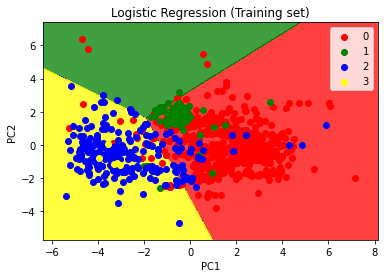

In [47]:
X_set, y_set = X1_train, y1_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue','yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue', 'yellow'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

**Visualising the Test set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


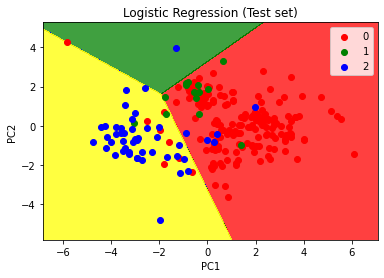

In [48]:
X_set, y_set = X1_test, y1_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue','yellow'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [52]:
rock_name = datasetpro['ROCK NAME']

Text(0.5, 1.0, 'PCA of IRIS dataset')

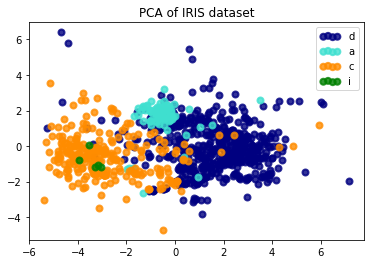

In [54]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'green']
lw = 2

for color, i, rock_name in zip(colors, [0, 1, 2, 3], rock_name):
    plt.scatter(X1_train[y1_train == i, 0], X1_train[y1_train == i, 1], color=color, alpha=.8, lw=lw,
                label=rock_name)
plt.legend(loc='best', shadow=False, scatterpoints=4)
plt.title('PCA of IRIS dataset')